# Neuronale Netze - Einführung

In [85]:
import torch
import numpy as np

from matplotlib import pyplot as plt

Neuronale Netze sind Funktionen: sie haben eine Ein- und Ausgabe.
Wir können sie z.B. 
- mit Bildern füttern, und sie sagen uns das Tier, das darauf abgebildet ist.
- mit Daten über eine Schüler\*in versorgen, und sie sagen uns die Abinote.
- nach einem Gedicht fragen, und sie schreiben uns ein Haiku.

Bevor sie dies machen können, müssen wir sie jedoch trainieren.
Unsere neuronalen Netzwerke bestehen aus mehreren Schichten von Neuronen, die jeweils mit allen Neuronen der benachbarten Schichten verbunden sind.
Wir überreichen die Eingabe an die erste Schicht (z.B. ein Pixel pro Neuron).
In jeder Schicht erhält nun das Neuron die Ausgaben der Vorgänger, gewichtet sie, 
addiert sie und fügt noch einen Bias hinzu.

Damit besteht ein Neuron aus einem Vektor $w$ an Gewichten und einer Zahl $b$ (Bias).
Gegeben eine Eingabe $x$ (die Ausgabe der Neuronen des vorherigen Layers) führt es nun die Berechnung
$w \cdot x + b$
aus.

In PyTorch können wir ein Neuron mit der Funktion `torch.nn.Linear` erzeugen:

In [86]:
neuron = torch.nn.Linear(2,1)

Wir geben die Anzahl der Eingaben als erstes Argument an.
Das zweite Argument gibt die Anzahl der Neuronen an, die wir in der Schicht erzeugen wollen.

Die Gewichte und der Bias werden zufällig automatisch initialisiert, wir können sie aber auch überschreiben.
Wir setzen $w = (1, 2)$ und $b = 3$.

In [87]:
w = torch.tensor([1.0,2.0])
b = torch.tensor(3.0)

neuron.weight.data = w
neuron.bias.data = b

Was ist die Ausgabe des Neurons für $x = (3,2)$? Versuch es erst im Kopf bevor du die Zelle ausführst. Vergiss den Bias nicht!

In [88]:
x = torch.tensor([3.0, 2.0])

neuron(x).data

tensor(10.)

**Aufgabe**
- Erzeuge nun selbst einen Layer mit 10 Neuronen und je 3 Eingaben. 
- Gewichte und Bias brauchst du nicht anzupassen.
- Generiere eine Eingabe $x$ und schicke sie durch den Layer.

In [89]:
layer = torch.nn.Linear(3,10) ### <-- Layer erzeugen
x = torch.tensor([1.0, 2.0, 3.0])

layer(x)

tensor([-2.6371, -1.0249, -2.5479,  1.2591,  0.2810, -0.4284,  1.6784, -1.2418,
        -1.5500, -1.3075], grad_fn=<AddBackward0>)

Schau dir einmal die Gewichte und Bias an: wir haben separate Gewichte für jedes Neuron.

In [90]:
layer.weight.data

tensor([[ 0.4095, -0.5010, -0.5762],
        [-0.4442,  0.0864, -0.2793],
        [-0.0555, -0.3081, -0.5099],
        [ 0.4001, -0.4295,  0.5041],
        [-0.3723, -0.3157,  0.4399],
        [ 0.0949,  0.3774, -0.3728],
        [-0.1280,  0.3530,  0.5432],
        [ 0.3308, -0.4255, -0.3180],
        [-0.0929, -0.1190, -0.2623],
        [ 0.2441, -0.0261, -0.5489]])

In [91]:
layer.bias.data

tensor([-0.3160,  0.0844, -0.3466,  0.2057, -0.0349, -0.1598, -0.5292,  0.2323,
        -0.4323,  0.1472])

Du kannst natürlich auch mehrere Eingaben gleichzeitig verarbeiten. Um uns Arbeit zu sparen können wir zufällige Eingaben erzeugen. 

In [92]:
x_rnd = torch.rand(3,5)
x_rnd

tensor([[0.7228, 0.1020, 0.2717, 0.4001, 0.0601],
        [0.3836, 0.6958, 0.2399, 0.6856, 0.4795],
        [0.1559, 0.9606, 0.2015, 0.6394, 0.9868]])

In [93]:
layer(x_rnd)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x5 and 3x10)

Ups, das ging schief. Lies die Fehlermeldung und versuche den Fehler zu korrigieren.

## Aktivierungsfunktionen

Neuronen sollen die gesammelten Informationen erst ab einer gewissen Relevanz bzw. Stärke weitergeben.
Dies erreichen wir durch eine Aktivierungsfunktion. Nachdem das Neuron seine Eingaben aufsummiert hat, wird diese angewandt. Die am häufigsten verwendete ist ReLU: sie gibt nur positive Werte weiter:

In [94]:
relu = torch.nn.ReLU()
three = torch.tensor(3)
print("relu(-3) =", relu(-three).item())
print("relu( 3) =", relu(three).item())

relu(-3) = 0
relu( 3) = 3


Versuche die ReLU-Funktion selbst zu implementieren:

In [95]:
def my_relu(x):
    return max(0.0, x) # <-- Lösung hier

Teste die Funktion auf verschiedenen Werten, es sollte immmer `True` ausgegeben werden:

In [96]:
x = 32
my_relu(x) == relu(torch.tensor(x)).item()

True

Was ist die Ableitung der ReLU-Funktion, können wir sie für die Eingabe $0$ bestimmen?
Argumentiere mit dem Differenzenquotienten.

## Netzwerke schichten

Wir können nun ganz einfach die Layer zu einem Netzwerk schichten: immer Neuronen und Aktivierungsfunktionen im Wechsel.

In [97]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 16),  # <-- input layer
    torch.nn.ReLU(),# /      diese Zahlen müssen gleich sein
    torch.nn.Linear(16, 16), # <-- hidden layer
    torch.nn.ReLU(), # /     diese Zahlen müssen gleich sein
    torch.nn.Linear(16, 16), # <-- hidden layer
    torch.nn.ReLU(), # /     diese Zahlen müssen gleich sein
    torch.nn.Linear(16, 1)   # <-- output layer
)
net

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
)

Wir können nun eine Eingabe $x = 2$ durch das Netzwerk schicken, jedoch müssen wir sie dafür zuvor in einen Tensor packen:

In [98]:
x = torch.tensor([2.0])
net(x)

tensor([-0.1000], grad_fn=<AddBackward0>)

Verdopple nun den vorletzten Layer auf eine Größe von 32:

In [99]:
net_32 = torch.nn.Sequential(
    torch.nn.Linear(1, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1)
)
net_32

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
)

In [100]:
print("Korrekt!" if net_32[4].in_features == 32 else "Falsche Anzahl Neuronen")

x = torch.tensor([2.0])
net_32(x)

Korrekt!


tensor([0.1532], grad_fn=<AddBackward0>)

## Neuronale Netze Trainieren

Zu Beginn haben wir gesagt, dass neuronale Netze Funktionen sind, sie können sogar jede beliebige Funktion darstellen. Dafür müssen wir jedoch die Gewichte richtig setzen.
Die Gewichte richtig einzustellen ist von Hand jedoch schnell mühsam, bereits unser kleines Netz aus dem letzten Kapitel hat bereits zu viele Parameter (Gewichte inkl. Bias)! Wie viele eigentlich? (Tipp: Jedes Neuron hat ein Gewicht pro Eingabe, plus den Bias)

In [101]:
num_weights = None # <-- Lösung eintragen
num_weights == sum(p.numel() for p in net.parameters())

False

Wir brauchen also eine automatische Möglichkeit die Parameter zu optimieren (wir nennen das "trainieren").

Die Grundidee ist, dass wir Eingaben, für die wir das Ergebnis bereits kennen durch das Netzwerk schicken, und das Ergebnis des neuronalen Netzes mit dem erwarteten Wert vergleichen. Diese Daten heißen Trainingsdaten, ein Beispiel hier:

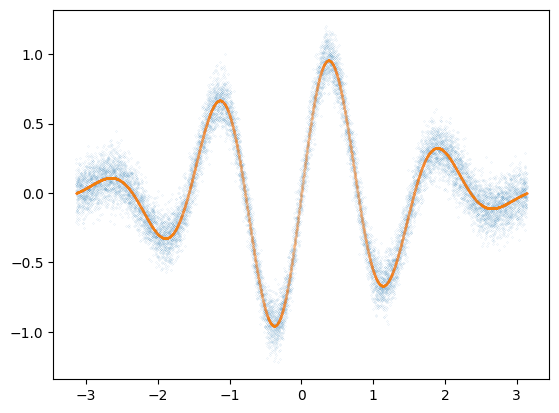

In [193]:
data_train = torch.load('data/1d_dataset_train.pt')
x_train = data_train['x']
y_train = data_train['y']
plt.plot(x_train, y_train, '.', markersize=0.1)
plt.plot(x_train, 1. * np.exp(-x_train**2 / 3.31) * np.sin(x_train * 4), '.', markersize=0.1)

from scipy.optimize import curve_fit

In [184]:
def func(x, a, b, c):
    return a * np.exp(-x**2 / b) * np.sin(c * x)

In [188]:
x_train.numpy().shape

(15000, 1)

In [190]:
popt, pcov = curve_fit(func, x_train.numpy()[:, 0], y_train.numpy()[:, 0])


In [191]:
popt

array([0.99854837, 3.31989697, 4.00360318])

In [174]:
torch.std_mean(y_train[7600:7700])

(tensor(0.4090), tensor(-0.0331))

Nun stellen wir die Gewichte ein (dazu später mehr), und prüfen mittels der Testdaten, wie nah wir schon an der Funktion sind. Zum Vergleich in blau die aktuellen (schlechten) Ergebnisse unseres Netzwerks:

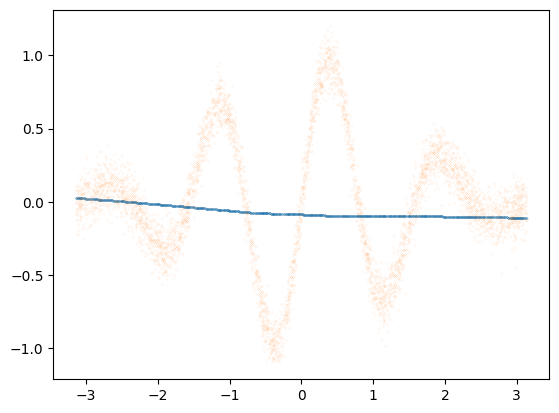

In [103]:
data_test = torch.load('data/1d_dataset_test.pt')
x_test = data_test['x']
y_test = data_test['y']

with torch.no_grad():
    y_pred_test = net(x_test)

plt.plot(x_test, y_pred_test, '.', markersize=0.1)
plt.plot(x_test, y_test, '.', markersize=0.1)

### Fehlerfunktion

Wir sehen z.B. für $x \approx 0.55$, dass wir ca. $0.82$ erwarten, unser Netzwerk jedoch ca. $0$ vorhersagt. Indem du `i` änderst, kannst andere Datenpunkte auswählen.

In [104]:
i = 5
print("Eingabe: ", x_test[i].item())
print("Erwartete Ausgabe: ", y_test[i].item())
print("Vorhersage Netzwerk: ", y_pred_test[i].item())

Eingabe:  0.5518484115600586
Erwartete Ausgabe:  0.8240465521812439
Vorhersage Netzwerk:  -0.0955122634768486


Um auszudrücken, wie gut unsere aktuellen Vorhersagen sind, wollen wir den Fehler zwischen erwarteter Ausgabe und der Vorhersage berechnen. Dieser ist einfach der durchschnittliche Fehler gemittelt über alle Testdaten.

Für einen einzelnen Datenpunkt berechnen wir den Fehler als
$(Y^i_{\textit{test}} - Y^i_{\textit{pred}})^2$ (Squared Error).
Man könnte erwarten, dass der Fehler als $\|Y^i_{\textit{test}} - Y^i_{\textit{pred}}\|$ definiert sein sollte, aber damit lässt sich schlechter arbeiten, deswegen quadrieren wir.

Implementiere den Squared Error für einen Datenpunkt:

In [105]:
def squared_err(x,y):
    return (x - y) ** 2

y_test_i = 3.0
y_pred_i = 6.0

# Sollte 9.0 zurückgeben
squared_err(y_test_i, y_pred_i)

9.0

Programmiere nun den Mean Squared Error (MSE) als durchschnittlichen Fehler über alle Datenpunkte:

In [106]:
def mse(x, y):
    err = 0
    l = 0
    for (xi, yi) in zip(x,y):
        err = err + squared_err(xi, yi)
        l = l + 1
    if l > 0:
        err = err / l
    return err

# Sollte 5.0 zurückgeben
mse_x = torch.tensor([3.0, 4.0])
mse_y = torch.tensor([6.0, 5.0])

mse(mse_x, mse_y)

tensor(5.)

Natürlich ist der MSE in PyTorch bereits eingebaut:

In [107]:
torch_mse = torch.nn.MSELoss()

torch_mse(mse_x, mse_y)

tensor(5.)

Wie du siehst, heißt die Funktion `MSELoss`. *Loss* bezeichnet in der Optimierung für den Fehler gegenüber der optimalen Lösung.

### Stochastic Gradient Descent

Wir wollen den Fehler optimieren, d.h. möglichst auf $0$ drücken. Dann sollte sich die blaue Kurve den roten Datenpunkten annähern.
Um das hinzubekommen können wir die Gewichte des neuronalen Netzwerks anpassen, die in jedem Neuron gespeichert sind.

Wir wählen zuerst ein paar zufällige Trainingsdaten (Minibatch) aus.

In [108]:
batch_ind = torch.randint(len(x_train), (16,))
x_batch = x_train[batch_ind, :]
y_batch = y_train[batch_ind, :]
print(batch_ind)
print(x_batch)
print(y_batch)

tensor([ 7413, 13062,  5405, 12879,   640,  7340, 10120,  4476,  8920, 10180,
        11511,  6467, 10975, 13813, 13629, 10308])
tensor([[ 0.1233],
        [ 2.5770],
        [ 2.5013],
        [ 0.3467],
        [-0.6505],
        [-1.3580],
        [ 0.2276],
        [ 2.7605],
        [ 1.0058],
        [-2.2776],
        [-2.3989],
        [-2.1070],
        [ 3.1061],
        [-2.5393],
        [ 1.8057],
        [ 1.9044]])
tensor([[ 0.6656],
        [-0.0724],
        [ 0.0599],
        [ 0.8612],
        [-0.3369],
        [ 0.5760],
        [ 0.6736],
        [-0.1210],
        [-0.5031],
        [-0.0373],
        [ 0.0107],
        [-0.2486],
        [ 0.1000],
        [ 0.3613],
        [ 0.3421],
        [ 0.3239]])


Diese schicken wir durch das Netzwerk und bestimmen damit unsere Vorhersagen.

In [109]:
y_pred = net(x_batch)
y_pred

tensor([[-0.0885],
        [-0.1036],
        [-0.1029],
        [-0.0934],
        [-0.0749],
        [-0.0443],
        [-0.0910],
        [-0.1055],
        [-0.0942],
        [-0.0053],
        [-0.0003],
        [-0.0124],
        [-0.1091],
        [ 0.0060],
        [-0.0991],
        [-0.0996]], grad_fn=<AddmmBackward0>)

Für jede Vorhersage wissen wir auch, was die korrekte Ausgabe wäre und können daher den Loss berechnen.
Diese Phase ist der Forward-Pass.

In [110]:
loss = torch_mse(y_pred, y_batch)
loss

tensor(0.2071, grad_fn=<MseLossBackward0>)

Nun bestimmen wir mittels Backpropagation, wie wir die Gewichte anpassen müssen, um den Loss ein klein wenig geringer zu machen.

In [111]:
loss.backward()

Um zu bestimmen, wie genau die Gewichte angepasst werden sollen, benötigen wir einen Optimizer. Wir verwenden den sehr bekannten Algorithmus *Adam*. 

In [112]:
optimizer = torch.optim.Adam(net.parameters())

print("Einige Parameter vor dem Schritt:")
print(list(net.parameters())[0].data)

optimizer.step()

print("\nEinige Parameter nach dem Schritt:")
print(list(net.parameters())[0].data)


Einige Parameter vor dem Schritt:
tensor([[-0.0071],
        [-0.6123],
        [-0.7259],
        [-0.2294],
        [ 0.6758],
        [ 0.3417],
        [ 0.8321],
        [ 0.8314],
        [ 0.7386],
        [ 0.1325],
        [-0.4887],
        [-0.6664],
        [-0.0309],
        [-0.4841],
        [ 0.6949],
        [ 0.7962]])

Einige Parameter nach dem Schritt:
tensor([[-0.0081],
        [-0.6133],
        [-0.7269],
        [-0.2284],
        [ 0.6748],
        [ 0.3407],
        [ 0.8331],
        [ 0.8324],
        [ 0.7376],
        [ 0.1335],
        [-0.4897],
        [-0.6674],
        [-0.0299],
        [-0.4851],
        [ 0.6939],
        [ 0.7972]])


Nach jedem Schritt müssen die Gradienten mittels `optimizer.zero_grad()` zurückgesetzt werden.

**Aufgabe** Implementiere den Trainingsalgorithmus und trainiere dein Netzwerk.

In [113]:
from tqdm import tqdm

max_iter = 1000

for it in tqdm(range(max_iter)):
    # Erzeuge Mini-Batch
    batch_ind = torch.randint(len(x_train), (16,))
    x_batch = x_train[batch_ind, :]
    y_batch = y_train[batch_ind, :]
    
    # Vorhersage des Netzwerks
    y_pred = net(x_batch)
    
    # Loss berechnen
    loss = torch_mse(y_pred, y_batch)
    
    # Backpropagation
    loss.backward()
    
    # Optimizer step
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 1000/1000 [00:00<00:00, 1951.01it/s]


**Aufgabe** Berechne die Vorhersagen des Netzwerkes und bestimme den Loss auf dem Testset.

In [114]:
with torch.no_grad():
    y_pred_test = net(x_test)
    print(torch_mse(y_pred_test, y_test))

tensor(0.0242)


**Aufgabe** Erweitere deinen Trainingsalgorithmus, sodass schon während des Trainings die Performance des Netzes in regelmäßigen Abständen bestimmt wird und der Loss gespeichert wird, sodass du ihn nach dem Training plotten kannst.
Passe außerdem deine Netzwerkarchitektur und die Trainingsparameter an, sodass du bessere Ergebnisse bekommst.

Schritte:
1. Kopiere Algorithmus
2. Jeden 100ten Schritt: berechne Loss auf **Test**daten, gib ihn aus
3. Jeden 100ten Schritt: plotte Vorhersagen auf den **Test**daten vs. erwartete Ausgaben
4. In jedem Schritt: Speichere Loss auf **Trainings**daten in Liste.
5. Passe Netzwerkarchitektur + Parameter an

  0%|          | 0/2000 [00:00<?, ?it/s]

tensor(0.2085)


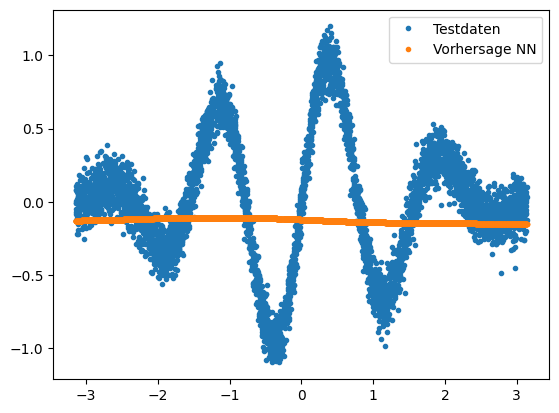

  0%|          | 1/2000 [00:00<13:09,  2.53it/s]

tensor(0.1849)


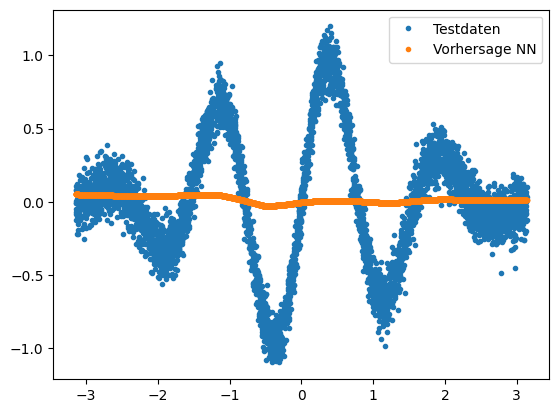

  5%|▌         | 101/2000 [00:00<00:09, 196.29it/s]

tensor(0.1617)


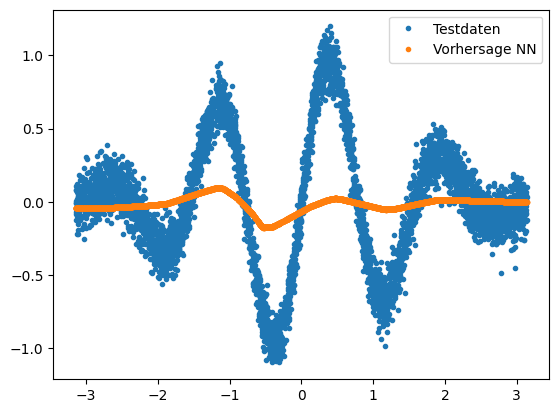

 10%|█         | 201/2000 [00:00<00:06, 295.09it/s]

tensor(0.1037)


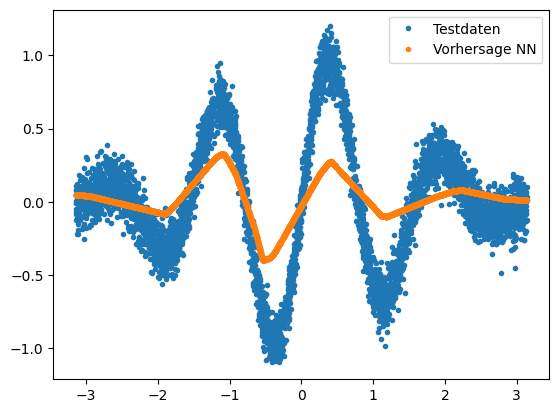

 15%|█▌        | 301/2000 [00:01<00:06, 253.56it/s]

tensor(0.0444)


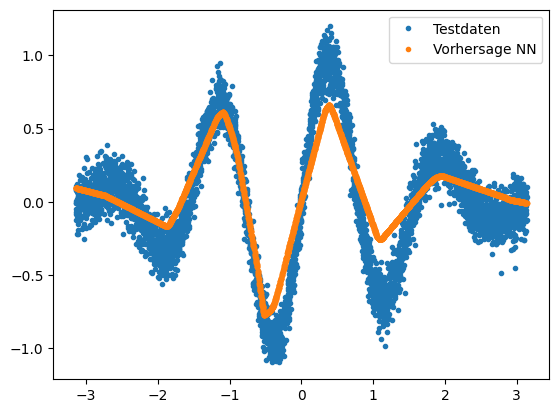

 20%|██        | 401/2000 [00:01<00:05, 307.93it/s]

tensor(0.0197)


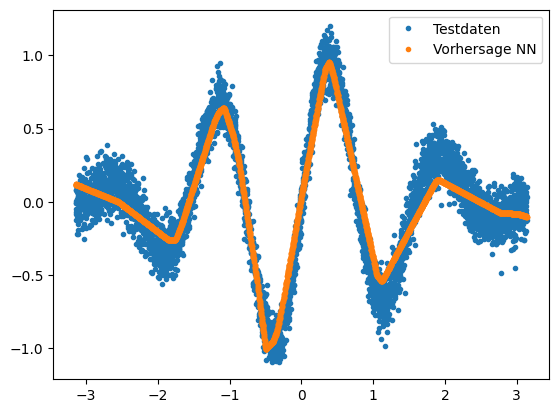

 25%|██▌       | 501/2000 [00:01<00:04, 349.64it/s]

tensor(0.0148)


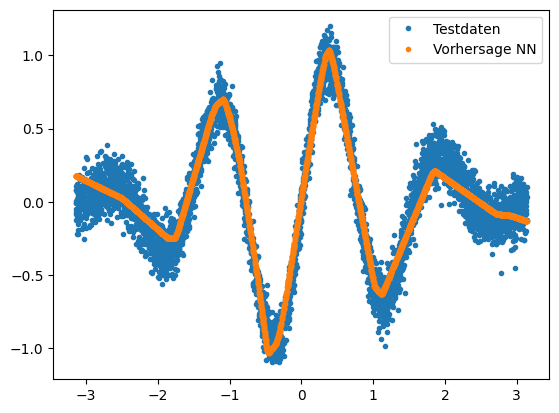

 30%|███       | 601/2000 [00:02<00:04, 296.36it/s]

tensor(0.0129)


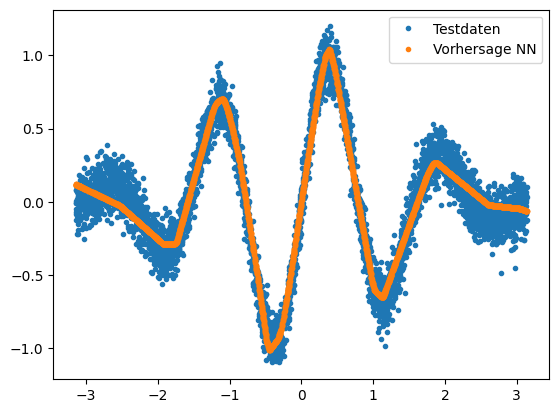

 35%|███▌      | 701/2000 [00:02<00:03, 334.68it/s]

tensor(0.0129)


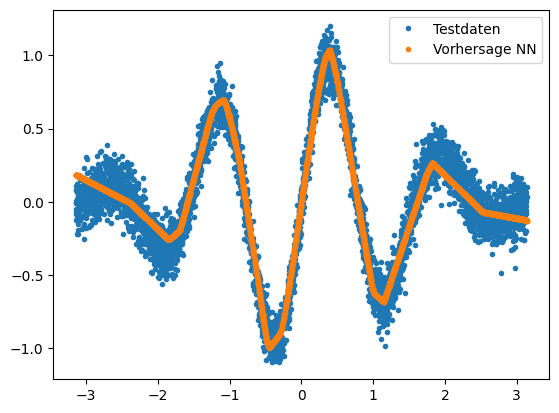

 40%|████      | 801/2000 [00:02<00:03, 364.04it/s]

tensor(0.0130)


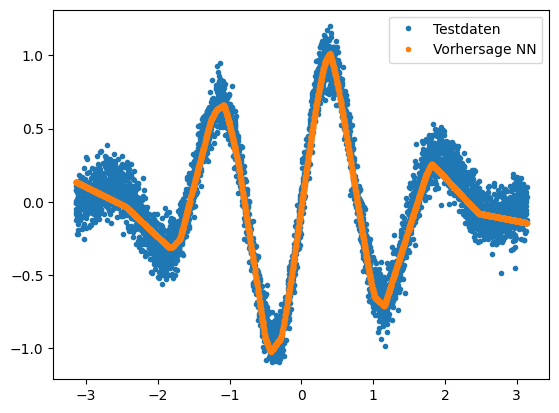

 45%|████▌     | 901/2000 [00:03<00:03, 305.56it/s]

tensor(0.0114)


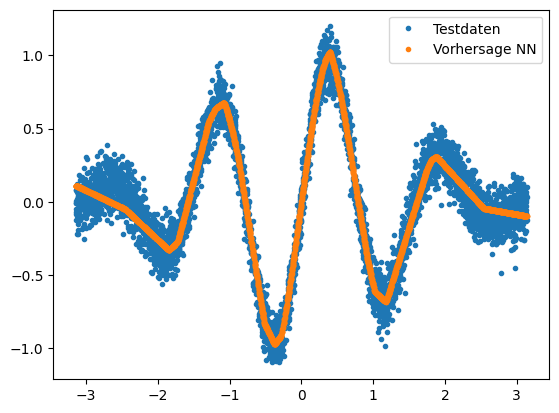

 50%|█████     | 1001/2000 [00:03<00:02, 340.86it/s]

tensor(0.0116)


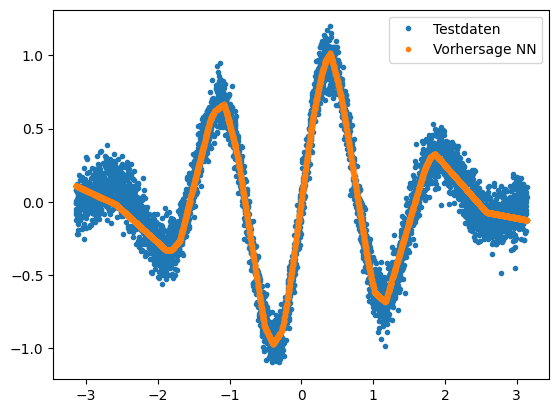

 55%|█████▌    | 1101/2000 [00:03<00:02, 370.05it/s]

tensor(0.0121)


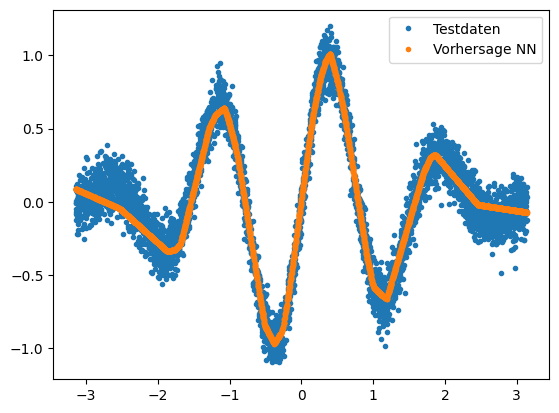

 60%|██████    | 1201/2000 [00:03<00:02, 311.28it/s]

tensor(0.0123)


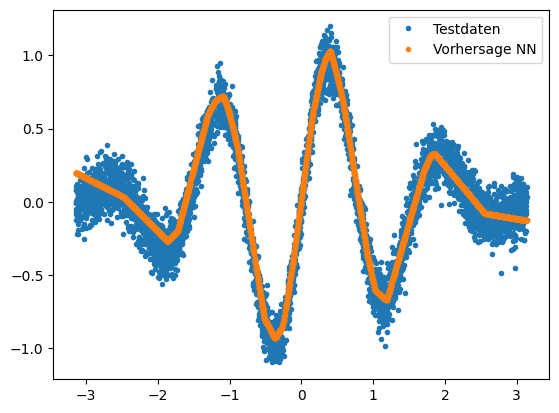

 65%|██████▌   | 1301/2000 [00:04<00:02, 345.42it/s]

tensor(0.0117)


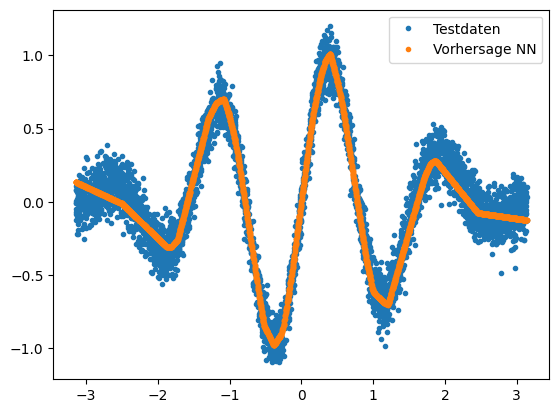

 70%|███████   | 1401/2000 [00:04<00:01, 372.45it/s]

tensor(0.0111)


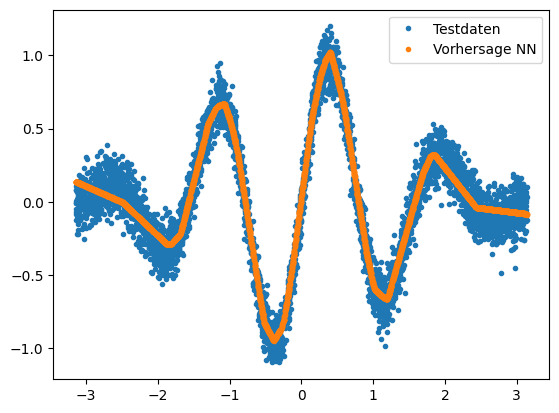

 75%|███████▌  | 1501/2000 [00:04<00:01, 309.88it/s]

tensor(0.0114)


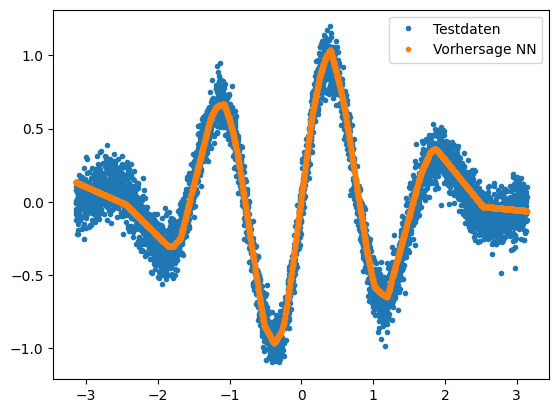

 80%|████████  | 1601/2000 [00:05<00:01, 342.81it/s]

tensor(0.0111)


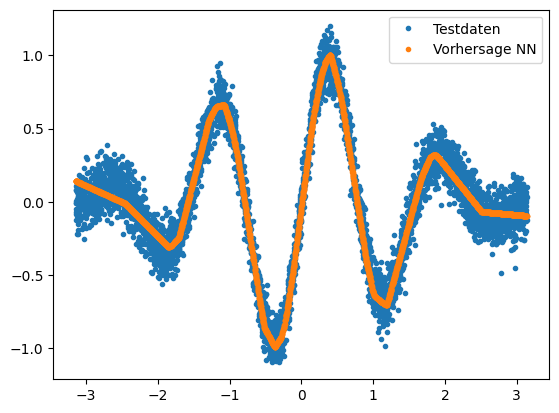

 85%|████████▌ | 1701/2000 [00:05<00:00, 370.96it/s]

tensor(0.0112)


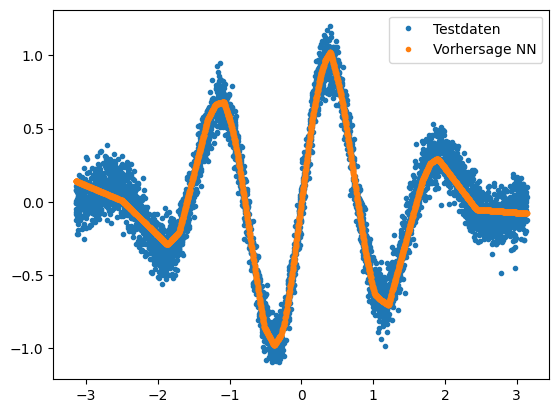

 90%|█████████ | 1801/2000 [00:05<00:00, 310.56it/s]

tensor(0.0110)


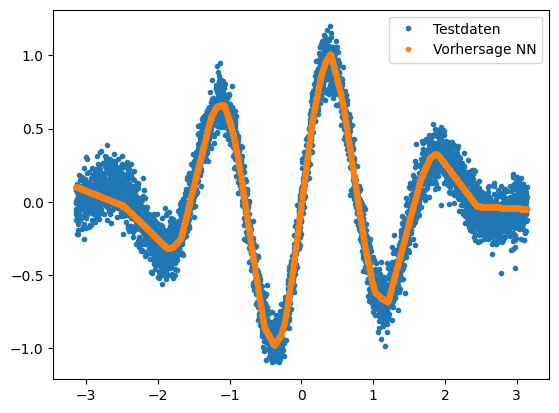

100%|██████████| 2000/2000 [00:05<00:00, 334.60it/s]


In [196]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1)    
)


loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())


max_iter = 2000

loss_hist = []

for it in tqdm(range(max_iter)):
    # Erzeuge Mini-Batch
    batch_ind = torch.randint(len(x_train), (64,))
    x_batch = x_train[batch_ind, :]
    y_batch = y_train[batch_ind, :]
    
    # Vorhersage des Netzwerks
    y_pred = net(x_batch)
    
    # Loss berechnen
    loss = loss_fn(y_pred, y_batch)
    
    # Backpropagation
    loss.backward()
    
    # Optimizer step
    optimizer.step()
    optimizer.zero_grad()
    
    # Speichere Loss
    loss_hist.append(loss.item())
    
    # Evaluierung
    if it % 100 == 0:
        # Loss auf Testdaten berechnen
        with torch.no_grad():
            y_pred_test = net(x_test)
            print(loss_fn(y_pred_test, y_test))

        # Ergebnisse grafisch darstellen
        plt.plot(x_test, y_test, '.')
        plt.plot(x_test, y_pred_test, '.')
        plt.legend(['Testdaten', 'Vorhersage NN'])
        plt.show()

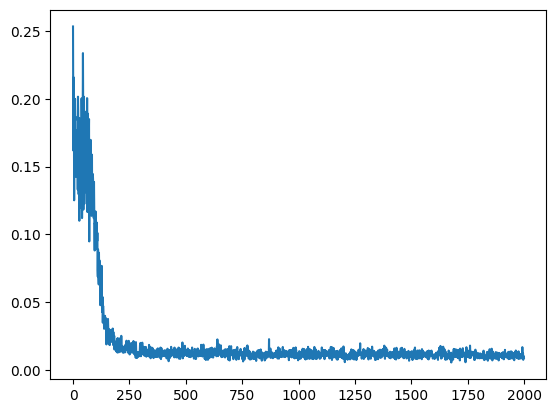

In [116]:
# Loss während des Trainings plotten
plt.plot(loss_hist)
plt.show()

tensor(0.0107)


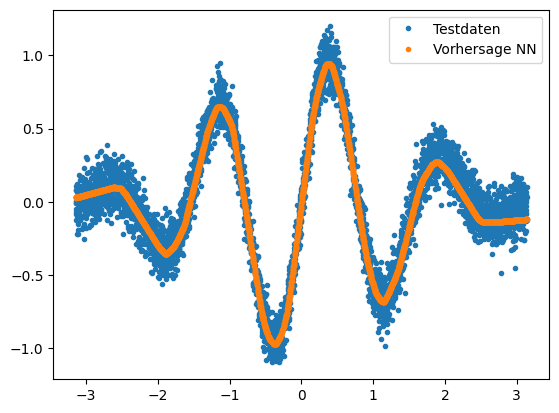

In [117]:
# Loss auf Testdaten berechnen
with torch.no_grad():
    y_pred_test = net(x_test)
    print(loss_fn(y_pred_test, y_test))

# Ergebnisse grafisch darstellen
plt.plot(x_test, y_test, '.')
plt.plot(x_test, y_pred_test, '.')
plt.legend(['Testdaten', 'Vorhersage NN'])
plt.show()

## Ziffern klassifizieren

### Aufgabe 7

Als nächstes widmen wir uns der Klassifikation von Ziffern. Wir verwenden hierfür den MNIST-Datensatz, den man sich über die Funktion [`torchvision.datasets.MNIST`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) herunterladen kann. Außerdem kannst du mit der Funktion direkt Transformationen auf dem Datensatz ausführen. Wir wollen die Bilder direkt mit [`torchvision.transforms.ToTensor`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor) zu Tensoren konvertieren.

In [118]:
import torchvision

mnist_train = torchvision.datasets.MNIST('data/', train=True, 
                                         transform=torchvision.transforms.ToTensor(),
                                         download=True)
mnist_test = torchvision.datasets.MNIST('data/', train=False, 
                                         transform=torchvision.transforms.ToTensor(),
                                         download=True)

Einige Zifferen als Beispiele:

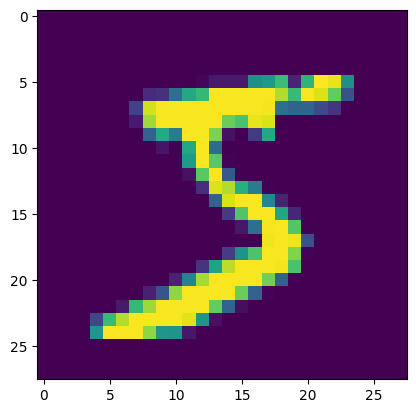

5


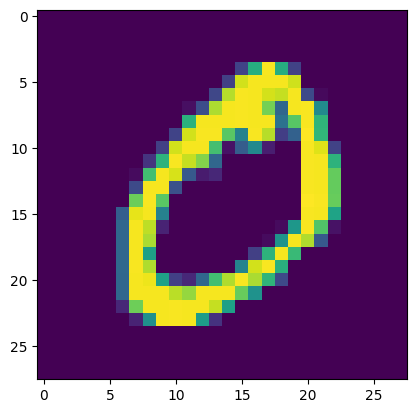

0


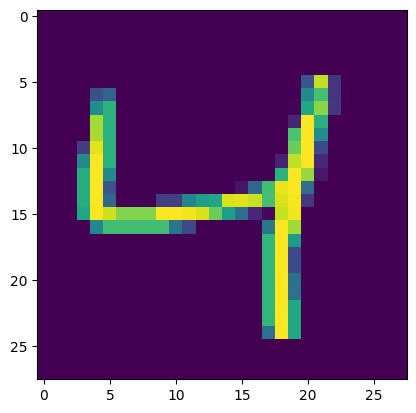

4


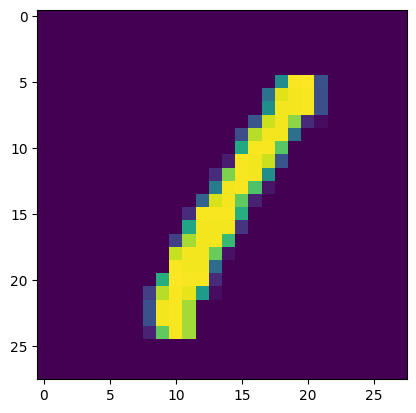

1


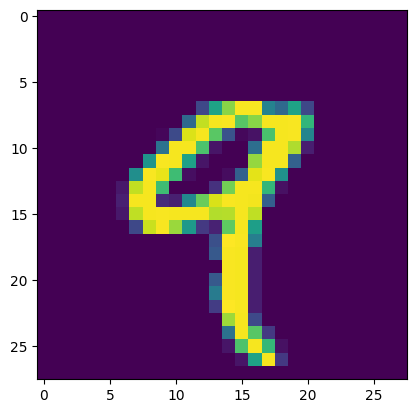

9


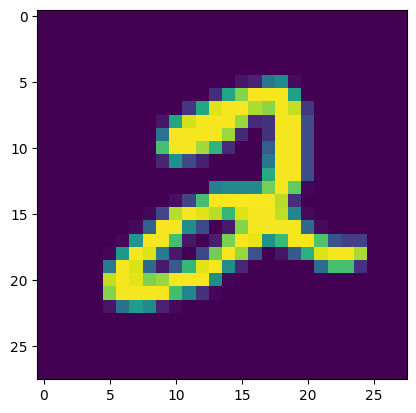

2


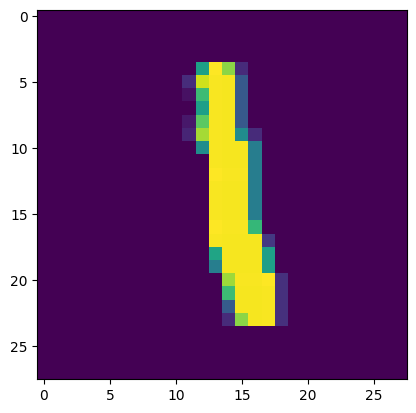

1


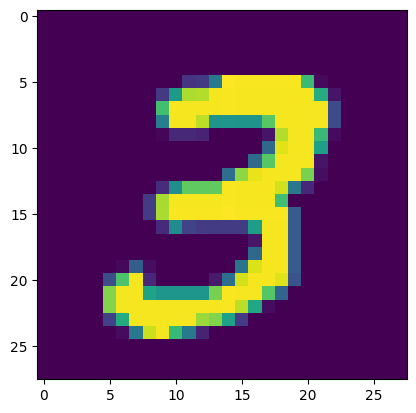

3


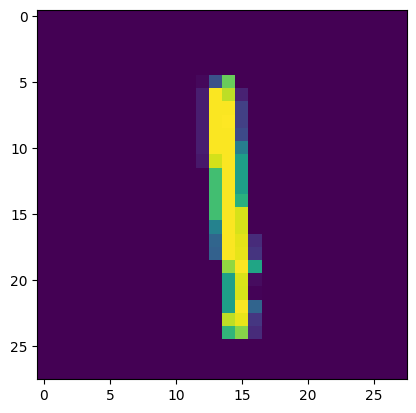

1


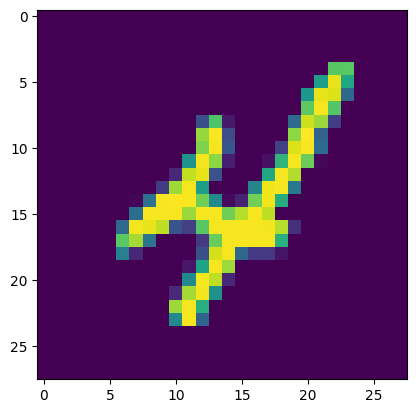

4


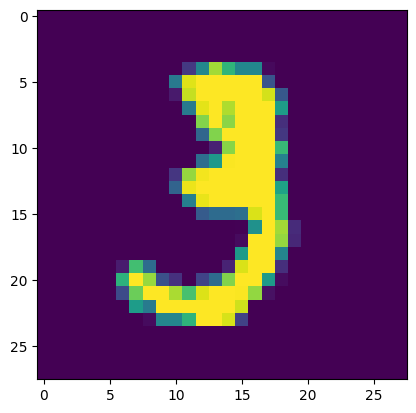

3


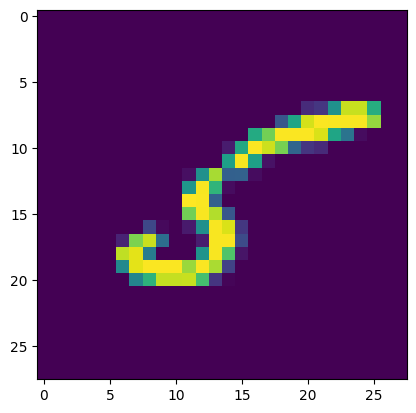

5


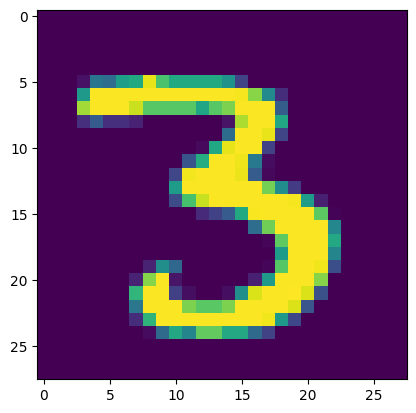

3


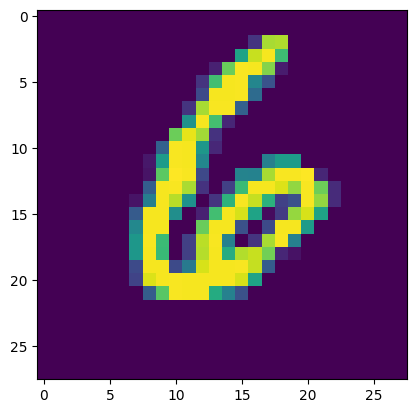

6


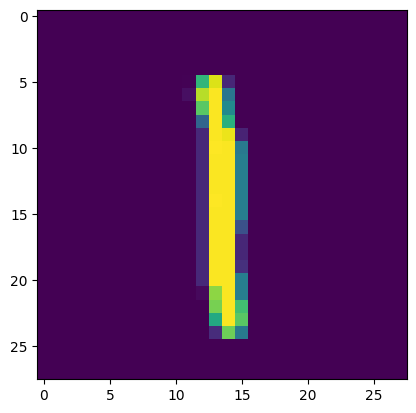

1


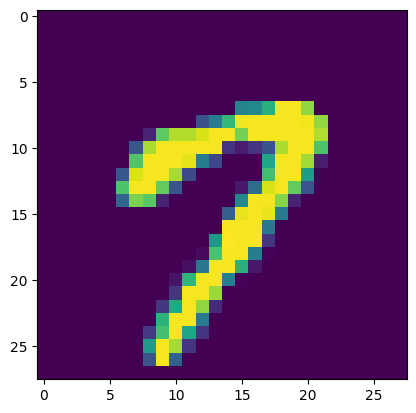

7


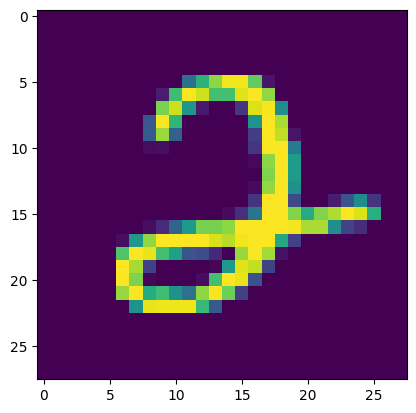

2


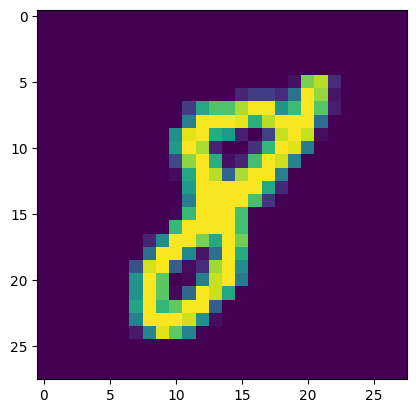

8


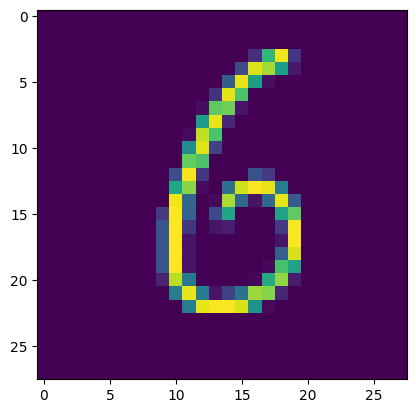

6


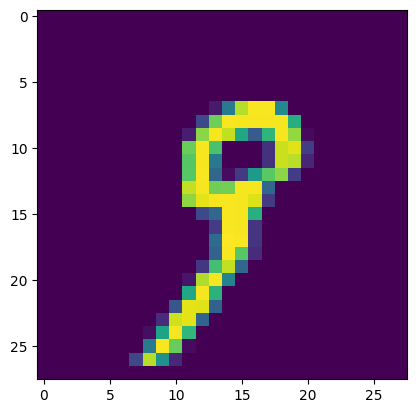

9


In [119]:
for i in range(20):
    plt.imshow(torch.reshape(mnist_train[i][0], (28, 28)))
    plt.show()

    print(mnist_train[i][1])

Beim Training des letzten Modells haben wir die Mini-Batches manuell erzeugt. Allerdings gibt es die Funktion [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), die einem diese Aufgabe abnimmt.

**Aufgabe** Erzeuge einen solchen `DataLoader` für das Trainings- und Testset mit Batch-Größe 16. Achte darauf, dass (nur) die Trainingsdaten gemischt werden müssen.

In [120]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=16)

Der Aufbau der neuronalen Netzes zur Klassifikation der Ziffern ist ähnlich dem im vorherigen Problem, allerdings müssen wir einige Dinge beachten.

Da es sich um Bilder handelt, müssen wir diese erst in Vektoren umwandeln. Das ist mit der Funktion [`torch.nn.Flatten`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) möglich, die eine Schicht des neuronalen Netzwerks erzeugt.
Außerdem muss das Netzwerk jetzt nicht mehr eine sondern 10 Zahlen zurück geben.
Jede stellt die Wahrscheinlichkeit dar, dass die konkrete Eingabe die jeweilige Ziffer darstellt.

**Aufgabe** Implementiere ein solches Netz.

In [121]:
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 ** 2, 64), 
    torch.nn.ReLU(), 
    torch.nn.Linear(64, 64), 
    torch.nn.ReLU(), 
    torch.nn.Linear(64, 64), 
    torch.nn.ReLU(), 
    torch.nn.Linear(64, 10))

net(torch.zeros(1, 28, 28)) # Test, sollte keinen Fehler liefern

tensor([[-0.0913, -0.0268,  0.1080,  0.0354, -0.0615,  0.0834, -0.0818, -0.0309,
          0.0003, -0.0755]], grad_fn=<AddmmBackward0>)

**Aufgabe** Erstelle außerdem den Adam-`Optimizer` und den für Klassifikation benötigten [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

In [122]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

Um das Netzwerk zu trainieren, führen wir eine `for`-Schleife über den `DataLoader` aus. Damit iterieren wir einmal durch den gesamten Datensatz, was als eine Epoche bezeichnet wird. Mit einer zweiten `for`-Schleife können wir mehrere solcher Epochen ausführen.

**Aufgabe** Ergänze den Trainingsalgorithmus und trainiere dein Modell. Plotte anschließen den Loss.

In [123]:
n_epoch = 5

loss_hist = []

for ep in range(n_epoch):
    for x_batch, y_batch in tqdm(train_loader):
        # Vorhersage des Netzwerks
        y_pred = net(x_batch)

        # Loss berechnen
        loss = loss_fn(y_pred, y_batch)

        # Backpropagation
        loss.backward()

        # Optimizer step
        optimizer.step()
        optimizer.zero_grad()

        # Speichere Loss
        loss_hist.append(loss.item())

100%|██████████| 3750/3750 [00:07<00:00, 491.84it/s]


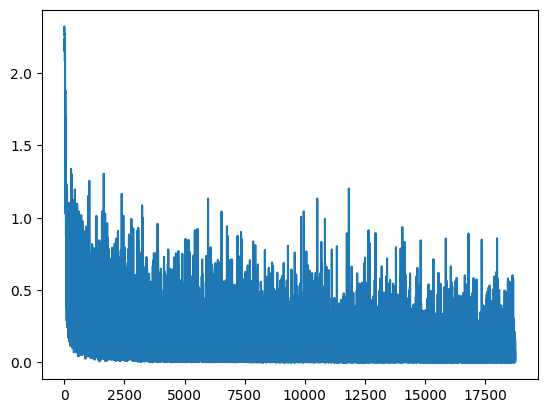

In [124]:
plt.plot(loss_hist)
plt.show()

**Aufgabe** Berechne die Genauigkeit deines Netzwerkes, also wie viele Bilder richtig klassifiziert werden, auf dem Testset.

In [125]:
sum_correct = 0
sum_imgs = 0

for x_batch, y_batch in tqdm(test_loader):
    # Vorhersage des Netzes ohne Gradientenberechnung
    with torch.no_grad():
        y_pred = net(x_batch)
    
    # Vorhergesagtes Label
    y_pred = torch.argmax(y_pred, dim=1)
        
    # Anzahl der Bilder updaten
    sum_imgs += len(x_batch)
    
    # Anzahl der korrekt klassifizierten Bilder
    sum_correct += torch.sum(y_pred == y_batch).item()

# Accuracy berechnen und ausgeben
accuracy = sum_correct / sum_imgs
print('Accuracy auf dem Testset: ', str(accuracy * 100) + "%")



100%|██████████| 625/625 [00:00<00:00, 859.22it/s]

Accuracy auf dem Testset:  97.05%


**Aufgabe** Wiederhole das Training und berechne die Genauigkeit diesmal nach jeder Epoche. Verbessere außerdem deine Netzwerkarchitektur.

In [126]:
# Du kannst deinen Code aus den vorherigen Aufgaben nutzen und anpassen.

# Bonus: Backpropagation selbst implementieren

Einige imports zu Beginn:

In [127]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Wir definieren eine einfache Funktion $f(x) := 3x^2 - 4x + 5$.

f(3) = 20.0


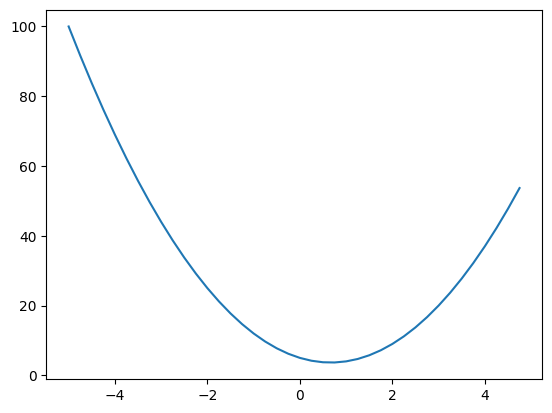

In [128]:
def f(x):
  return 3*x**2 - 4*x + 5

print("f(3) =", f(3.0))


xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

Bestimme die Ableitung bei $x = 3$ mit dem Differenzenquotienten:

In [129]:
h = 0.0001
x = 3.0
(f(x + h) - f(x))/h

14.000300000063248

Für zusammengesetzte Ausdrücke funktioniert das Ganze ebenfalls:

In [130]:
# Eingaben
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


Wir wollen nun automatisch die Gradienten für solche Ausdrücke bestimmen.
Dafür definieren wir eine Klasse `Value`, die diese repräsentiert:

In [131]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._op = _op
    self.label = label
    self._prev = set(_children)
    self.grad = 0.0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out
  
  def relu(self):
    x = self.data
    t = max(0,x)
    out = Value(t, (self, ), 'relu')
    
    return out

Wir können nun einen ähnlichen Ausdruck erzeugen und auswerten:

In [132]:

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

Um die Ausdrücke anschaulicher zu machen bauen wir eine Funktion, die diese zeichnet:

In [133]:

import sys
!conda install --yes --prefix {sys.prefix} graphviz
!{sys.executable} -m pip install graphviz
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /home/maxi/anaconda3/envs/naka

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gobject-introspection-1.72.0|   py38hbb6d50b_2         1.6 MB
    libcurl-8.1.1              |       h91b91d3_0         394 KB
    librsvg-2.54.4             |       h36cc946_3         6.0 MB
    ------------------------------------------------------------
                                           Total:         8.0 MB

The following NEW packages will be INSTALLED:

  atk-1.0            pkgs/main/linux-64::atk-1.0-2.36.0-ha1a6a79_0 
  boost-cpp          pkgs/main/linux-64::boost-cpp-1.73.0-h7f8727e_12 
  bzip2              pkgs/main/linux-64::bzip2-1.0.8-h7b6447c_0 
  c-ares             pkgs/main/linux-64::c-ares-1.19.0-h5eee18b_0 
  cairo              pkgs/m

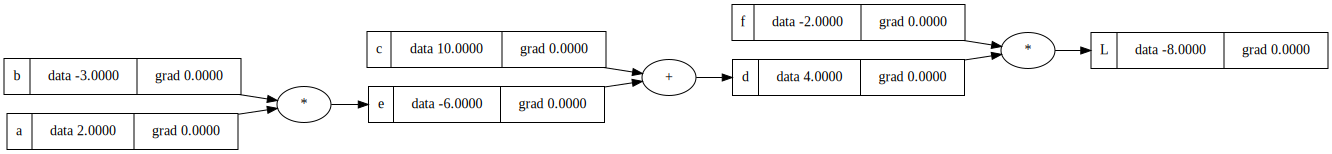

In [134]:
draw_dot(L)

Versuche mit der `Value`-Klasse einen Fully Connected Layer mit 2 Inputs, einem Output und ReLU-Aktivierung zu definieren. Gibt den Knoten zufällige Werte und aussagekräftige Label.

In [135]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.relu(); o.label = 'o'



Zeichne dein Netzwerk:

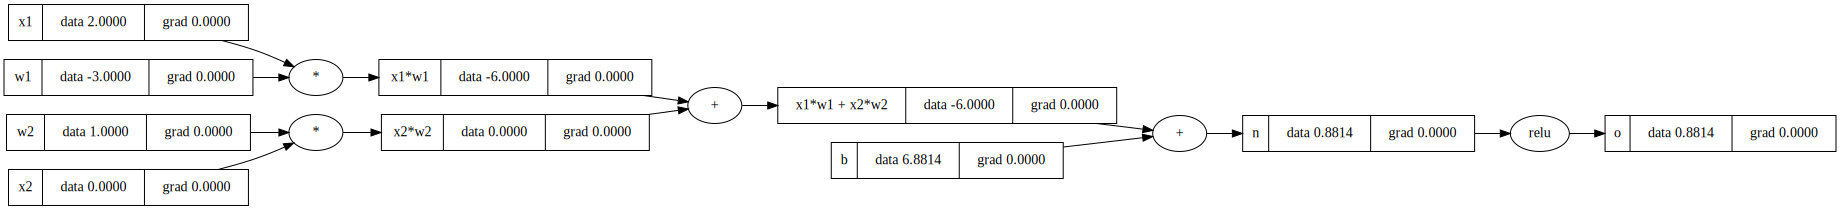

In [136]:
draw_dot(o)

Wir berechnen die Ableitung jedes Knotens rückwärts, also von rechts nach links.
Angenommen, wir wissen bereits, wie sich die Ausgabe des Ausdrucks abhängig von $c = a + b$ ändert. Jetzt können wir auch bestimmen, wie sich die Ausgabe abhängig von $a$ oder $b$ ändert, ganz einfach mittels der Kettenregel:
Sei z.B. der Gradient von c $2$, wenn wir nun $c$ um $h = 0.0001$ erhöhen, erhöht sich auch die Ausgabe um ca. $2 * h$.
Wie erhöht sich die Ausgabe, wenn wir $a$ um $h$ erhöhen? Genau, auch um ca. $2 * h$, wir können also einfach den Gradienten von $c$ übernehmen.

Füge dies in der Klasse unten hinzu: 

In [137]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._op = _op
    self.label = label
    self._prev = set(_children)
    self.grad = 0.0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad = 1.0 * out.grad # übernimm out.grad
      other.grad = 1.0 * out.grad # übernimm out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out
  
  def relu(self):
    x = self.data
    t = max(0,x)
    out = Value(t, (self, ), 'relu')
    
    return out

Etwas komplizierter ist es bei der Multiplikation. Für $c = a * b$ und $a = -2$, Gradient von c = $3$ gilt, wenn wir $b$ um $h$ erhöhen, ändert sich die Ausgabe um $-2 * 3 * h = 6 * h$. Wir müssen also mit `a.data` multiplifieren.

Füge dies in der Klasse unten hinzu: 

In [138]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._op = _op
    self.label = label
    self._backward = lambda: None
    self._prev = set(_children)
    self.grad = 0.0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad = 1.0 * out.grad # übernimm out.grad
      other.grad = 1.0 * out.grad # übernimm out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    
    return out
  
  def relu(self):
    x = self.data
    t = max(0,x)
    out = Value(t, (self, ), 'relu')
    
    def _backward():
      self.grad = (0.0 if self.data < 0.0 else 1.0) * out.grad
    
    out._backward = _backward
    
    return out

Wie du siehst haben wir auch gleich die Ableitung von ReLU definiert.

Setze nun den Gradienten von $o = 0$ und ruf dann in der richtigen Reihenfolge (von rechts nach links) die Funktion `_backward` auf den Knoten auf. Überprüfe das Ergebnis auf Korrektheit.

Um nicht jedes Mal von Hand die `_backward`-Funktion aufrufen zu müssen, schreiben wir eine Funktion, die die richtige Reigenfolge berechnet und dann überall `_backward` aufruft.
Die Reihenfolge zu definieren geht so:

In [139]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
list(reversed(topo))

[Value(data=0.8813735870195432),
 Value(data=0.8813735870195432),
 Value(data=6.881373587019543),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=1.0)]

Implementiere die Funktion `backward`, sodass sie die Topographie berechnet, dann den Gradienten des aktuellen Knoten auf $1.0$ setzt und schließlich überall `_backward()` aufruft

In [140]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._op = _op
    self.label = label
    self._backward = lambda: None
    self._prev = set(_children)
    self.grad = 0.0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad = 1.0 * out.grad # übernimm out.grad
      other.grad = 1.0 * out.grad # übernimm out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out
  
  def relu(self):
    x = self.data
    t = max(0,x)
    out = Value(t, (self, ), 'relu')
    
    return out

  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


Irgendetwas geht noch schief:

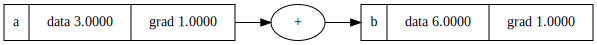

In [141]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

Versuche den Fehler zu finden und zu korrigieren.
Tipp: `=` $\mapsto$ `+=`